In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\l_san\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)

Bad key text.latex.preview in file C:\Users\l_san\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\l_san\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.templat

In [2]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [9]:
prices = pd.read_csv('../Datasets/prices_ts.csv', index_col=0, parse_dates=True)
prices.head()

,symbol,close,volume
date,,,
2010-01-04,AAPL,214.009998,123432400.0
2010-01-04,ABT,54.459951,10829000.0
2010-01-04,AIG,29.889999,7750900.0
2010-01-04,AMAT,14.300000,18615100.0
2010-01-04,ARNC,16.650013,11512100.0


In [10]:
appl = prices[prices['symbol']=='AAPL']

In [11]:
appl.drop(['symbol', 'volume'], axis=1, inplace=True)

C:\Users\l_san\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [13]:
abt = prices[prices['symbol'] == 'ABT']
abt.drop(['symbol', 'volume'], axis=1, inplace=True)

In [14]:
aig = prices[prices['symbol'] == 'AIG']
aig.drop(['symbol', 'volume'], axis=1, inplace=True)

In [ ]:
aig = prices[prices['symbol'] == 'AIG']
aig.drop(['symbol', 'volume'], axis=1, inplace=True)

In [23]:
companies= list(np.unique(prices.symbol))
companies[:10]

['AAPL', 'ABT', 'AIG', 'AMAT', 'ARNC', 'BAC', 'BSX', 'C', 'CHK', 'CMCSA']

In [26]:
prices_df= pd.DataFrame()
for column in np.unique(prices.symbol):
    column_arr = prices[prices['symbol'] == column]
    column_arr.drop(['symbol', 'volume'], axis=1, inplace=True)
    prices_df[column] = column_arr

In [32]:
prices_df.head()

,AAPL,ABT,AIG,AMAT,ARNC,BAC,BSX,C,CHK,CMCSA,...,QCOM,RF,SBUX,T,V,VZ,WFC,XOM,XRX,YHOO
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,214.009998,54.459951,29.889999,14.30,16.650013,15.690000,9.01,3.40,28.090001,16.969999,...,46.939999,5.42,23.049999,28.580000,88.139999,33.279869,27.320000,69.150002,8.63,17.100000
2010-01-05,214.379993,54.019953,29.330000,14.19,16.130013,16.200001,9.04,3.53,28.970002,16.740000,...,48.070000,5.60,23.590000,28.440001,87.129997,33.339868,28.070000,69.419998,8.64,17.230000
2010-01-06,210.969995,54.319953,29.139999,14.16,16.970013,16.389999,9.16,3.64,28.650002,16.620001,...,47.599998,5.67,23.420000,27.610001,85.959999,31.919873,28.110001,70.019997,8.56,17.170000
2010-01-07,210.580000,54.769952,28.580000,14.01,16.610014,16.930000,9.09,3.65,28.720002,16.969999,...,48.980000,6.17,23.360001,27.299999,86.760002,31.729875,29.129999,69.800003,8.60,16.700001
2010-01-08,211.980005,55.049952,29.340000,14.55,17.020014,16.780001,9.00,3.59,28.910002,16.920000,...,49.470001,6.18,23.280001,27.100000,87.000000,31.749874,28.860001,69.519997,8.57,16.700001


In [41]:
companies2= companies[:5]

In [42]:
prices_df2 = prices_df[companies2]

In [ ]:
prices_df.index = pd.to_datetime(prices_df.index)

In [43]:
prices_df.index = pd.to_datetime(prices_df2.index)

In [49]:
prices_df3 = prices_df2/prices_df2.iloc[0,:] *100

In [53]:
prices_df3_arr = prices_df3.values

<AxesSubplot:xlabel='date'>

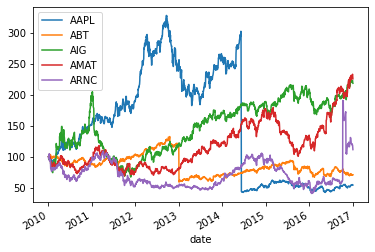

In [55]:
prices_df3.plot()

In [59]:
appl = prices_df3['AAPL']

In [235]:
X = appl[:2014]
y = appl[:2014].shift(40)

In [236]:
y = y.fillna(np.nanmedian(y))

In [237]:
from sklearn.linear_model import Ridge, Lasso

In [238]:
from sklearn.model_selection import TimeSeriesSplit

In [239]:
cv1 = TimeSeriesSplit(n_splits=2)

In [240]:
for tr, tt in cv1.split(X,y):
    X_train = X[tr]
    X_test = X[tt]
    y_train= y[tr]
    y_test = y[tt]

In [241]:
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
y_test = y_test.values
y_train = y_train.values

In [242]:
ridge2 = Ridge(alpha=1e2)

In [243]:
ridge2.fit(X_train, y_train)

Ridge(alpha=100.0)

[]

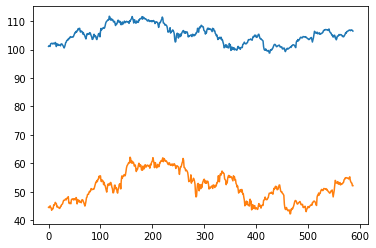

In [244]:
fig, ax = plt.subplots()
ax.plot(ridge2.predict(X_test))
ax.plot(y_test)
ax.plot()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

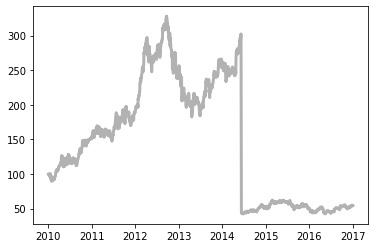

In [200]:
alphas = [.1,1e2,1e3]
fig, ax= plt.subplots()
ax.plot(appl, color='k', alpha=.3, lw=3)

for ii, alpha in enumerate(alphas):
    y_predicted= Ridge(alpha=alpha).fit(X_train,y_train).predict(X_test)
    ax.plot(y_predicted)
    ax.legend('True values', 'Model 1', 'Model 2', 'Model 3')
    ax.set(xlabel='Time')
    

In [81]:
prices_df3.head(1)

,AAPL,ABT,AIG,AMAT,ARNC
date,,,,,
2010-01-04,100.0,100.0,100.0,100.0,100.0


In [96]:
prices_df3['2014']

C:\Users\l_san\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


,AAPL,ABT,AIG,AMAT,ARNC
date,,,,,
2014-01-02,258.459883,70.198374,169.655405,122.727266,63.243242
2014-01-03,252.782591,70.951219,170.357978,122.447552,63.483482
2014-01-06,254.161020,71.887692,169.019745,120.909098,63.243242
2014-01-07,252.343362,71.336821,171.328206,121.468538,63.303302
2014-01-08,253.941417,71.979501,173.335573,121.818182,65.045042
...,...,...,...,...,...
2014-12-24,52.338677,83.914877,188.290401,176.573427,94.714713
2014-12-26,53.263866,84.190303,188.758782,176.153853,95.015019
2014-12-29,53.226487,83.731251,188.992987,176.993000,95.015019


C:\Users\l_san\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='AAPL', ylabel='ABT'>

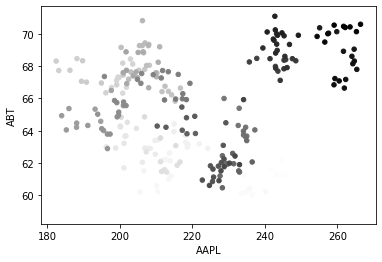

In [100]:
prices_df3['2013'].plot.scatter('AAPL', 'ABT', c=prices_df3['2013'].index)

In [103]:
ridge = Ridge(alpha=1e2)

In [130]:
ridge.fit(X_train, y_train)

Ridge(alpha=100.0)

ValueError: x and y must have same first dimension, but have shapes (1175, 1) and (587, 1)

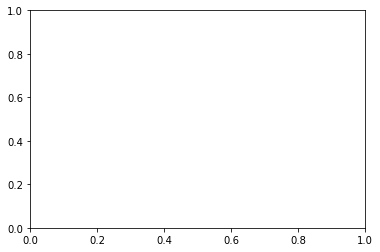

In [131]:
y_pred = ridge.predict(X_test)

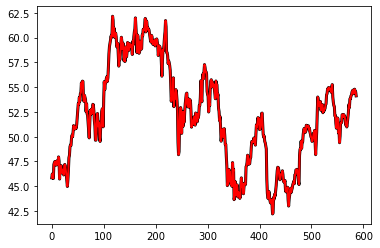

In [132]:
fig, ax= plt.subplots()

ax.plot(y_test, color='k', lw=3)
ax.plot(y_pred, color='r', lw=2)

In [135]:
prices_df3.isna().sum()

AAPL    0
ABT     0
AIG     0
AMAT    0
ARNC    0
dtype: int64

In [137]:
appl_missing = appl.copy()

In [144]:
appl_missing['2014'] = np.NaN

In [145]:
appl_missing['2011'] = np.NaN

In [146]:
appl_missing.isna().sum()

504

In [147]:
appl_interp = appl_missing.interpolate('linear')

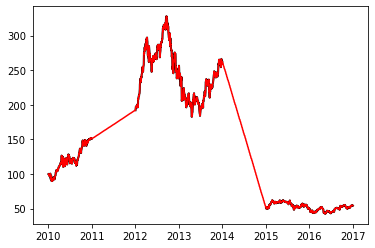

In [152]:
fig, ax = plt.subplots()
ax.plot(appl_missing, c='k', lw=2)
ax.plot(appl_interp, color='r')

In [167]:
def percentage_change(values):
    previous_values= values[:-1]
    last_value = values[-1]
    
    percent_change= (last_value- np.mean(previous_values)) / np.mean(previous_values)
    return(percent_change)
    

In [171]:
apl_pct= appl['2012'].rolling(20).aggregate(percentage_change)

In [166]:
appl[:100]

date
2010-01-04    100.000000
2010-01-05    100.172887
2010-01-06     98.579504
2010-01-07     98.397272
2010-01-08     99.051449
                 ...    
2010-05-20    111.097611
2010-05-21    113.228351
2010-05-24    115.303018
2010-05-25    114.583434
2010-05-26    114.064761
Name: AAPL, Length: 100, dtype: float64

In [173]:
apl_pct2= appl.rolling(20).aggregate(percentage_change)

In [169]:
apl_pct[:100]

date
2010-01-04         NaN
2010-01-05         NaN
2010-01-06         NaN
2010-01-07         NaN
2010-01-08         NaN
                ...   
2010-05-20   -0.077420
2010-05-21   -0.053332
2010-05-24   -0.030569
2010-05-25   -0.033566
2010-05-26   -0.034660
Name: AAPL, Length: 100, dtype: float64

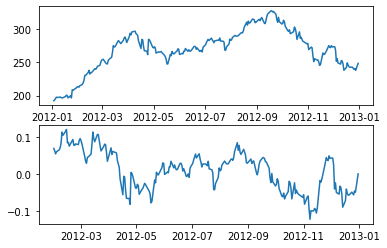

In [172]:
fig, ax = plt.subplots(2,1)
ax[0].plot(appl['2012'])

ax[1].plot(apl_pct)

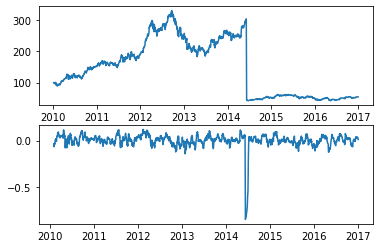

In [174]:
fig, ax = plt.subplots(2,1)
ax[0].plot(appl)

ax[1].plot(apl_pct2)

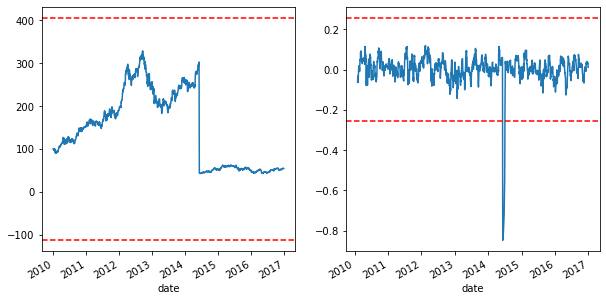

In [176]:
fig, axs = plt.subplots(1,2, figsize=(10,5))

for data, ax in zip([appl, apl_pct2], axs):
    this_mean = data.mean()
    this_std = data.std()
    
    data.plot(ax=ax)
    ax.axhline(this_mean+3*this_std, ls='--', c='r')
    ax.axhline(this_mean - 3*this_std, ls='--', c='r')

In [177]:
prices_out_cent= apl_pct2- apl_pct2.mean()

In [178]:
outliers = np.abs(prices_out_cent) > 3*prices_out_cent.std()

In [179]:
apl_out = apl_pct2.copy()
apl_out[outliers] = np.nanmedian(apl_out)

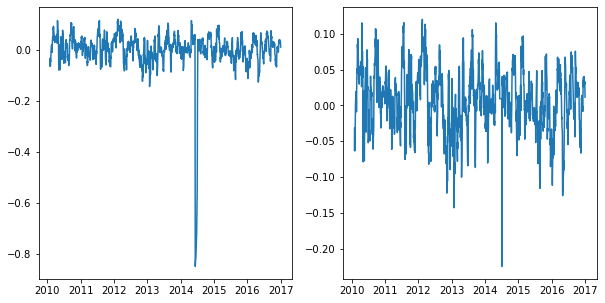

In [180]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(apl_pct2)
ax[1].plot(apl_out)

In [181]:
prices_df2.head(2)

,AAPL,ABT,AIG,AMAT,ARNC
date,,,,,
2010-01-04,214.009998,54.459951,29.889999,14.30,16.650013
2010-01-05,214.379993,54.019953,29.330000,14.19,16.130013


In [186]:
features = prices_df2.rolling(20).aggregate([np.std, np.max]).dropna()

In [187]:
features[:5]

AAPL                   ABT                  AIG             \
                 std        amax       std       amax       std       amax   
date                                                                         
2010-02-01  6.536228  215.039995  0.868830  56.239949  2.051966  29.889999   
2010-02-02  6.776924  215.039995  0.869197  56.239949  2.101032  29.629999   
2010-02-03  6.655202  215.039995  0.852509  56.239949  2.157249  29.629999   
2010-02-04  7.148351  215.039995  0.873895  56.239949  2.282004  29.629999   
2010-02-05  7.265069  215.039995  0.891497  56.239949  2.400626  29.629999   

                AMAT             ARNC             
                 std   amax       std       amax  
date                                              
2010-02-01  0.815610  14.87  1.557116  17.450013  
2010-02-02  0.834197  14.87  1.541017  17.450013  
2010-02-03  0.862663  14.87  1.545563  17.450013  
2010-02-04  0.916897  14.87  1.511028  17.450013  
2010-02-05  0.931594  14.87  1.463785  17.450013

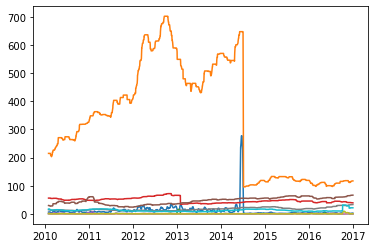

In [188]:
fig, ax = plt.subplots()
ax.plot(features)

In [189]:
from functools import partial

In [192]:
data = np.linspace(0,100)

list_func = [partial(np.percentile, q=i) for i in [20,40,60] ]

results = [function(data) for function in list_func]
                     

In [193]:
results

[20.0, 40.00000000000001, 60.0]

In [245]:
shifts = [0,1,2,3,4,5,6,7]

In [247]:
many_shifts = {s: appl.shift(s) for s in shifts}

In [291]:
many_shifts

{0: date
 2010-01-04    100.000000
 2010-01-05    100.172887
 2010-01-06     98.579504
 2010-01-07     98.397272
 2010-01-08     99.051449
                  ...    
 2016-12-23     54.446053
 2016-12-27     54.791834
 2016-12-28     54.558200
 2016-12-29     54.544182
 2016-12-30     54.118967
 Name: AAPL, Length: 1762, dtype: float64, 1: date
 2010-01-04           NaN
 2010-01-05    100.000000
 2010-01-06    100.172887
 2010-01-07     98.579504
 2010-01-08     98.397272
                  ...    
 2016-12-23     54.338583
 2016-12-27     54.446053
 2016-12-28     54.791834
 2016-12-29     54.558200
 2016-12-30     54.544182
 Name: AAPL, Length: 1762, dtype: float64, 2: date
 2010-01-04           NaN
 2010-01-05           NaN
 2010-01-06    100.000000
 2010-01-07    100.172887
 2010-01-08     98.579504
                  ...    
 2016-12-23     54.698378
 2016-12-27     54.338583
 2016-12-28     54.446053
 2016-12-29     54.791834
 2016-12-30     54.558200
 Name: AAPL, Length: 1762, dtyp

In [249]:
appl_shift = pd.DataFrame(many_shifts)

In [292]:
appl_shift

,0,1,2,3,4,5,6,7
date,,,,,,,,
2010-01-04,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,100.172887,100.000000,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,98.579504,100.172887,100.000000,NaN,NaN,NaN,NaN,NaN
2010-01-07,98.397272,98.579504,100.172887,100.000000,NaN,NaN,NaN,NaN
2010-01-08,99.051449,98.397272,98.579504,100.172887,100.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2016-12-23,54.446053,54.338583,54.698378,54.646978,54.502126,54.189058,54.118967,53.824589
2016-12-27,54.791834,54.446053,54.338583,54.698378,54.646978,54.502126,54.189058,54.118967
2016-12-28,54.558200,54.791834,54.446053,54.338583,54.698378,54.646978,54.502126,54.189058


In [272]:
ridge3  = Ridge(alpha=0.1)

In [273]:
ridge3.fit(appl_shift.dropna(), appl.iloc[7:])

Ridge(alpha=0.1)

In [274]:
ridge3.coef_

array([ 9.99998773e-01,  1.23251736e-06, -1.34473979e-08, -1.06527416e-08,
        1.55965620e-08, -1.72069907e-09,  1.84735080e-08, -1.77646332e-08])

<BarContainer object of 8 artists>

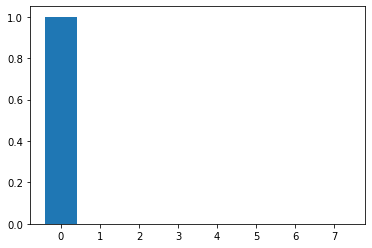

In [275]:
fig, ax = plt.subplots()
ax.bar(shifts, ridge3.coef_)

In [279]:
abt.head()

,close
date,
2010-01-04,54.459951
2010-01-05,54.019953
2010-01-06,54.319953
2010-01-07,54.769952
2010-01-08,55.049952


In [295]:
abt.index = pd.to_datetime(abt.index)

In [301]:
abt.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   1762 non-null   float64
dtypes: float64(1)
memory usage: 27.5 KB


In [296]:
list2 = [0,1,2,3,4,5,6,7]

In [304]:
abt = prices_df2['ABT']

In [316]:
abt_dic = {i : abt.shift(i) for i in list2}

In [320]:
abt_df = pd.DataFrame(abt_dic)

In [321]:
X = abt_df.fillna(np.nanmedian(abt_df))

In [318]:
ridge4= Ridge()

In [322]:
ridge4.fit(X, abt)

Ridge()

<BarContainer object of 8 artists>

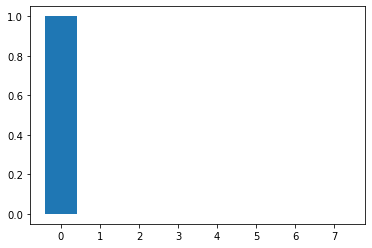

In [327]:
fig, ax = plt.subplots()
ax.bar(abt_df.columns, ridge4.coef_ )

In [332]:
def prices_perc2(data):
    last_value= data[-1]
    rest_values=data[:-1]
    difference = (last_value-rest_values)/rest_values
    return np.abs(difference)

In [333]:
abt_prices_perc = abt.aggregate(prices_perc2)

In [336]:
features = abt_prices_perc.rolling(20).aggregate([np.mean, np.std, np.max, np.min])

In [343]:
features = features.fillna(np.median(features))

C:\Users\l_san\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='date'>

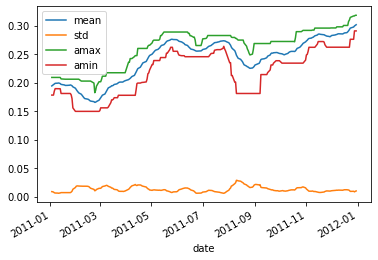

In [345]:
features['2011'].plot()

In [346]:
percentiles = [1,0,50,65,90,99]

In [350]:
abt_percen= {p: abt_prices_perc.rolling(20).aggregate(partial(np.percentile, q=p)) for p in percentiles}

In [364]:
abt_percen = pd.DataFrame(abt_percen)

In [372]:
abt_percen = abt_percen.fillna(np.nanmedian(abt_percen))
abt_percen[:5]

,1,0,50,65,90,99
date,,,,,,
2010-01-04,0.164454,0.164454,0.164454,0.164454,0.164454,0.164454
2010-01-05,0.164454,0.164454,0.164454,0.164454,0.164454,0.164454
2010-01-06,0.164454,0.164454,0.164454,0.164454,0.164454,0.164454
2010-01-07,0.164454,0.164454,0.164454,0.164454,0.164454,0.164454
2010-01-08,0.164454,0.164454,0.164454,0.164454,0.164454,0.164454


C:\Users\l_san\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  


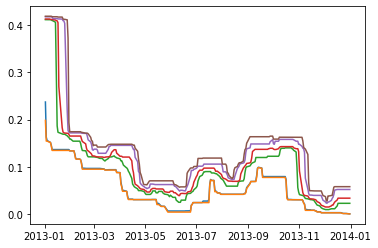

In [354]:
fig, ax = plt.subplots()
ax.plot(abt_percen['2013'])

<AxesSubplot:xlabel='date'>

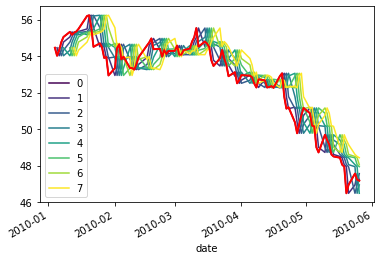

In [357]:
ax= abt_df.iloc[:100].plot(cmap=plt.cm.viridis)
abt.iloc[:100].plot(color='r', lw=2)

In [358]:
list3 = [0,1,2,3,4,5,6,7]

In [368]:
abt_percen[:4]

,1,0,50,65,90,99
date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN


In [380]:
abt_perc_shift = {i : abt_prices_perc.shift(i) for i in list3}

In [381]:
abt_perc_shift = pd.DataFrame(abt_perc_shift)

In [382]:
abt_perc_shift= abt_perc_shift.fillna(np.median(abt_perc_shift))

C:\Users\l_san\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='date'>

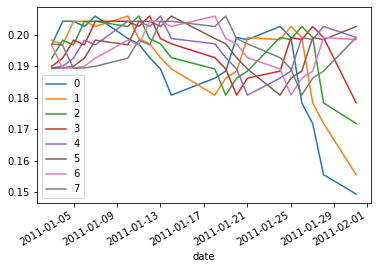

In [385]:
abt_perc_shift['2011-01'].plot()

In [393]:
X = abt_perc_shift.fillna(np.nanmedian(abt_perc_shift))

In [419]:
X2 =X.values

In [394]:
y= abt_prices_perc

In [420]:
y2 = y.values

In [395]:
ridge5 = Ridge()

In [396]:
ridge5.fit(X,y)

Ridge()

In [397]:
ridge5.coef_

array([0.38380333, 0.23741099, 0.14408706, 0.08995068, 0.05721773,
       0.03691569, 0.02542438, 0.01810649])

<BarContainer object of 8 artists>

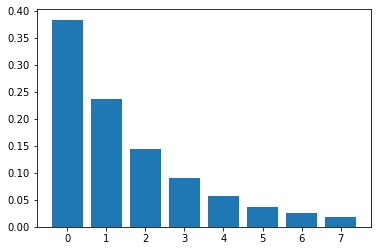

In [400]:
plt.bar(abt_perc_shift.columns, ridge5.coef_)

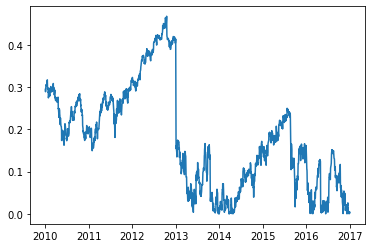

In [401]:
plt.plot(abt_prices_perc)

In [402]:
ridge5.score(X,y)

0.9943460084226278

In [416]:
ridge6 = Ridge()

In [410]:
cv2 = TimeSeriesSplit(n_splits=2)

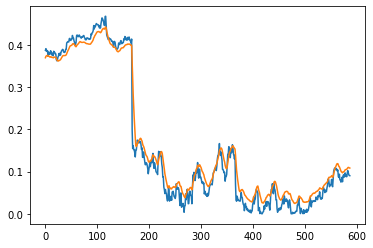

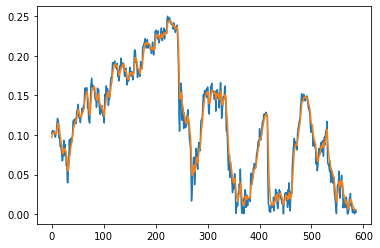

In [426]:
for ii, (tr, tt) in enumerate(cv2.split(X2,y2)):
    ridge6.fit(X2[tr],y2[tr])
    pred = ridge6.predict(X2[tt])
    
    fig, ax= plt.subplots()
    ax.plot(y2[tt])
    ax.plot(pred)
   
        

In [427]:
def my_pearsonr(est, X,y):
    y_pred = est.predict(X).squeete()
    
    my_corrcoef_matrix = np.corrcoef(y_pred, y.squeeze())
    my_corrcoef  = my_corrcof[1,0]
    return my_corrcoef